# MLPS Project: NFL Win Probability Modeling

## Shawn Leahy and David Brennan



## Initial Model Investigation and Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

#Might have to check how files are being imported
df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')
#df.head()

C:\Users\spleahy\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Initial Investigation

In [2]:
#List all columns for investigation
#for col in df.columns:
#    print(col)

Date
GameID
Drive
qtr
down
time
TimeUnder
TimeSecs
PlayTimeDiff
SideofField
yrdln
yrdline100
ydstogo
ydsnet
GoalToGo
FirstDown
posteam
DefensiveTeam
desc
PlayAttempted
Yards.Gained
sp
Touchdown
ExPointResult
TwoPointConv
DefTwoPoint
Safety
Onsidekick
PuntResult
PlayType
Passer
Passer_ID
PassAttempt
PassOutcome
PassLength
AirYards
YardsAfterCatch
QBHit
PassLocation
InterceptionThrown
Interceptor
Rusher
Rusher_ID
RushAttempt
RunLocation
RunGap
Receiver
Receiver_ID
Reception
ReturnResult
Returner
BlockingPlayer
Tackler1
Tackler2
FieldGoalResult
FieldGoalDistance
Fumble
RecFumbTeam
RecFumbPlayer
Sack
Challenge.Replay
ChalReplayResult
Accepted.Penalty
PenalizedTeam
PenaltyType
PenalizedPlayer
Penalty.Yards
PosTeamScore
DefTeamScore
ScoreDiff
AbsScoreDiff
HomeTeam
AwayTeam
Timeout_Indicator
Timeout_Team
posteam_timeouts_pre
HomeTimeouts_Remaining_Pre
AwayTimeouts_Remaining_Pre
HomeTimeouts_Remaining_Post
AwayTimeouts_Remaining_Post
No_Score_Prob
Opp_Field_Goal_Prob
Opp_Safety_Prob
Opp_Touchd

In [108]:
print('Unique Games: ',len(set(df['GameID'])))

Unique Games:  2048


In [109]:
print('Number of Plays: ',len(df['GameID']))

Number of Plays:  362447


In [5]:
#Change data type for consistency later on
df['GameID']=df['GameID'].astype(int)

In [6]:
#Check unique values for each parameter
for col in df:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

Date

['2009-09-10' '2009-09-13' '2009-09-14' '2009-09-20' '2009-09-21'
 '2009-09-27' '2009-09-28' '2009-10-04' '2009-10-05' '2009-10-11'
 '2009-10-12' '2009-10-18' '2009-10-19' '2009-10-25' '2009-10-26'
 '2009-11-01' '2009-11-02' '2009-11-08' '2009-11-09' '2009-11-12'
 '2009-11-15' '2009-11-16' '2009-11-19' '2009-11-22' '2009-11-23'
 '2009-11-26' '2009-11-29' '2009-11-30' '2009-12-03' '2009-12-06'
 '2009-12-07' '2009-12-10' '2009-12-13' '2009-12-14' '2009-12-17'
 '2009-12-19' '2009-12-20' '2009-12-21' '2009-12-25' '2009-12-27'
 '2009-12-28' '2010-01-03' '2010-09-09' '2010-09-12' '2010-09-13'
 '2010-09-19' '2010-09-20' '2010-09-26' '2010-09-27' '2010-10-03'
 '2010-10-04' '2010-10-10' '2010-10-11' '2010-10-17' '2010-10-18'
 '2010-10-24' '2010-10-25' '2010-10-31' '2010-11-01' '2010-11-07'
 '2010-11-08' '2010-11-11' '2010-11-14' '2010-11-15' '2010-11-18'
 '2010-11-21' '2010-11-22' '2010-11-25' '2010-11-28' '2010-11-29'
 '2010-12-02' '2010-12-05' '2010-12-06' '2010-12-09' '2010-12-12'
 '20

['PIT' 'TEN' nan 'CLE' 'MIN' 'NO' 'DET' 'DAL' 'TB' 'HOU' 'NYJ' 'IND' 'JAC'
 'DEN' 'CIN' 'CAR' 'PHI' 'KC' 'BAL' 'ATL' 'MIA' 'ARI' 'SF' 'STL' 'SEA'
 'NYG' 'WAS' 'GB' 'CHI' 'NE' 'BUF' 'OAK' 'SD' 'LA' 'JAX']
-------------------------------------------------------------
DefensiveTeam

['TEN' 'PIT' nan 'MIN' 'CLE' 'DET' 'NO' 'TB' 'DAL' 'NYJ' 'HOU' 'JAC' 'IND'
 'CIN' 'DEN' 'PHI' 'CAR' 'BAL' 'KC' 'MIA' 'ATL' 'SF' 'ARI' 'SEA' 'STL'
 'WAS' 'NYG' 'CHI' 'GB' 'BUF' 'NE' 'SD' 'OAK' 'LA' 'JAX']
-------------------------------------------------------------
desc

[ 'R.Bironas kicks 67 yards from TEN 30 to PIT 3. S.Logan to PIT 42 for 39 yards (M.Griffin).'
 '(14:53) B.Roethlisberger pass short left to H.Ward to PIT 47 for 5 yards (C.Hope).'
 '(14:16) W.Parker right end to PIT 44 for -3 yards (S.Tulloch).' ...,
 '(:22) (Shotgun) M.Stafford pass deep middle to A.Boldin for 35 yards, TOUCHDOWN.'
 "S.Martin kicks onside 11 yards from DET 35 to DET 46. R.Rodgers (didn't try to advance) to DET 46 for no gain

[nan 'left' 'right' 'middle']
-------------------------------------------------------------
InterceptionThrown

[0 1]
-------------------------------------------------------------
Interceptor

[nan 'T.Polamalu' 'V.Fuller' 'C.Finnegan' 'C.Griffin' 'A.Henry' 'D.Sharper'
 'S.Shanle' 'M.Jenkins' 'J.Busing' 'L.Sheppard' 'D.Cox' 'W.Woodyard'
 'T.Scheffler' 'S.Brown' 'J.Beason' 'A.Jordan' 'A.Samuel' 'J.Hanson'
 'D.Johnson' 'M.Peterson' 'P.Willis' 'N.Clements' 'J.Butler' 'O.Atogwe'
 'C.Webster' 'D.Hall' 'N.Collins' 'J.Jolly' 'T.Williams' 'A.Harris'
 'A.Schobel' 'Q.Jammer' 'M.Huff' 'A.Cason' 'R.Marshall' 'C.Houston'
 'C.Greenway' 'E.Wilson' 'T.Porter' 'D.Revis' 'D.Rodgers-Cromartie'
 'C.Woodson' 'D.Goldson' 'D.Whitner' 'B.Scott' 'S.Piscitelli' 'D.Landry'
 'A.Barnes' 'D.McBath' 'C.Tillman' 'B.Johnson' 'K.Phillips' 'G.Wilson'
 'A.Bethea' 'D.Foxworth' 'B.Ayanbadejo' 'E.Reed' 'E.Smith' 'C.Hope'
 'D.Harris' 'K.Simpson' 'R.Mathis' 'S.Spencer' 'T.Thomas' 'W.Smith'
 'D.Hawthorne' 'L.Briggs' 'J.Joseph' 

['None' '00-0022250' '00-0026164' '00-0026163' '00-0024260' '00-0022924'
 '00-0022217' '00-0003292' '00-0019693' '00-0023176' '00-0027130'
 '00-0025394' '00-0022746' '00-0026998' '00-0023774' '00-0021314'
 '00-0025409' '00-0024279' '00-0024011' '00-0024217' '00-0026204'
 '00-0026286' '00-0027129' '00-0026498' '00-0023544' '00-0026262'
 '00-0021678' '00-0026162' '00-0023440' '00-0022770' '00-0022177'
 '00-0022766' '00-0026113' '00-0021755' '00-0022922' '00-0026229'
 '00-0022092' '00-0019641' '00-0024332' '00-0026898' '00-0022787'
 '00-0024318' '00-0013694' '00-0024245' '00-0024275' '00-0021231'
 '00-0027003' '00-0024103' '00-0010346' '00-0020270' '00-0023439'
 '00-0026988' '00-0025439' '00-0027103' '00-0026941' '00-0020397'
 '00-0026367' '00-0023541' '00-0020462' '00-0021429' '00-0024242'
 '00-0020337' '00-0004161' '00-0026153' '00-0011022' '00-0021216'
 '00-0026189' '00-0027029' '00-0025423' '00-0023063' '00-0027080'
 '00-0021976' '00-0026158' '00-0026195' '00-0022178' '00-0025604'
 '0

[nan 'Fair Catch' 'Touchback' 'Touchdown']
-------------------------------------------------------------
Returner

['S.Logan' nan 'C.Finnegan' 'J.Ringer' 'A.Elam' 'P.Harvin' 'J.Cribbs'
 'D.Reynaud' 'S.Rice' 'R.Meachem' 'R.Bush' 'A.Brown' 'D.Bing' 'F.Jones'
 'C.Smith' 'P.Crayton' 'J.Jones' 'L.Washington' 'J.Leonhard' 'T.Rushing'
 'C.Simpson' 'B.Witherspoon' 'Q.Cosby' 'E.Royal' 'A.Caldwell' 'M.Goodson'
 'E.Hobbs' 'D.Jackson' 'C.Munnerlyn' 'J.Charles' 'C.Carr' 'Q.Lawrence'
 'E.Reed' 'M.Leggett' 'D.Edwards' 'B.Engram' 'A.Studebaker' 'E.Weems'
 'D.Bess' 'T.Ginn' 'P.Cobbs' 'B.Finneran' 'A.Rossum' 'A.Rolle'
 'L.Stephens-Howling' 'D.Avery' 'N.Burleson' 'D.Stanley' 'J.Forsett'
 'S.Gado' 'J.Wilson' 'D.Ware' 'M.Sellers' 'D.Hixon' 'R.Cartwright'
 'M.Hedgecock' 'S.Moss' 'H.Nicks' 'L.Betts' 'J.Nelson' 'D.Hester'
 'D.Manning' 'E.Bennett' 'L.Maroney' 'W.Welker' 'K.Faulk' 'R.Parrish'
 'L.McKelvin' 'L.Rankin' 'J.Higgins' 'D.Sproles' 'J.Norwood' 'M.Peterson'
 'D.Northcutt' 'A.Randle El' 'K.Darby' 'D.Thom

[nan 'J.McGraw' 'B.Williams' 'J.Hester' 'G.Hayes' 'E.Smith' 'C.Lynch'
 'G.Hardy' 'R.Jennings' 'D.Curry' 'D.Zeigler' 'P.Chung' 'R.Cartwright'
 'B.Myers' 'N.Schommer' 'W.Gay' 'K.Cox' 'T.Smith' 'J.McKnight' 'T.Shaw'
 'P.Bailey' 'R.Quinn' 'C.Clemons' 'J.Wilson' 'D.Baldwin' 'K.Osgood'
 'H.Farwell' 'M.Wilson' 'A.Talib' 'D.Rosario' 'Q.Groves' 'M.Mulligan'
 'M.Smith' 'L.Grant' 'S.Draughn' 'B.Braman' 'D.House' 'C.Matthews'
 'S.McManis' 'D.Watson' 'N.Irving' 'M.Harris' 'C.Francies' 'D.Bruton'
 'J.Thomas' 'C.Dahl' 'S.Johnson' 'J.Kearse' 'J.Lattimore' 'D.Moore'
 'J.DiManche' 'D.Gorrer' 'J.Stewart' 'A.Allen' 'J.Williams' 'J.Olawale'
 'A.Blue' 'C.McCain' 'J.Attaochu' 'A.Dixon' 'T.McDonald' 'A.Lynch'
 'T.Burton' 'T.Carder' 'J.Casey' 'J.Freeny' 'J.Newsome' 'T.Mays' 'D.Autry'
 'D.Shead' 'A.Thielen' 'J.Brinkley' 'B.Bolden' 'D.Stewart' 'T.Fede'
 'D.McCray' 'M.Mauti' 'J.Johnson' 'A.Jackson' 'M.Moore' 'Z.Vigil'
 'H.Pullard' 'C.Maragos' 'J.George' 'D.Alexander' 'R.Okwara' 'T.McEvoy'
 'J.Allen' 'J.Hughes' 'W

[ 0.28113771  0.1691167   0.16274677 ...,  0.01552767  0.0134632
  0.05750058]
-------------------------------------------------------------
Field_Goal_Prob

[ 0.21370014  0.29369979  0.30480453 ...,  0.42620946  0.50887484
  0.03025422]
-------------------------------------------------------------
Safety_Prob

[ 0.00359231  0.00363751  0.00382603 ...,  0.00072636  0.00073191
  0.00056764]
-------------------------------------------------------------
Touchdown_Prob

[ 0.31367562  0.42301139  0.42147842 ...,  0.27386378  0.2129524
  0.04799828]
-------------------------------------------------------------
ExPoint_Prob

[ 0.          0.9907954   0.99312827  0.95170715  0.9707554   0.95941093
  0.907225    0.93111495  0.72239806  0.85985489  0.79170151]
-------------------------------------------------------------
TwoPoint_Prob

[ 0.      0.4735]
-------------------------------------------------------------
ExpPts

[ 0.32352585  2.33799976  2.41590692 ...,  3.0250614   2.871405   -0.24126

Tie Games: 2014101202, 2012111110, 2013112403, 2016102312, 2016103000

In [7]:
#Initial columns to drop
df_cleaned = df.drop(columns=['desc','yrdln','PlayTimeDiff','time','Date','SideofField',
                              'PlayAttempted','DefTwoPoint','Passer','Passer_ID','PassLength','PassLocation','Interceptor',
                              'Rusher','Rusher_ID','RunLocation','RunGap','Receiver','Receiver_ID','Returner',
                              'BlockingPlayer','Tackler1','Tackler2','RecFumbTeam','RecFumbPlayer','PenalizedTeam',
                              'PenaltyType','PenalizedPlayer','Timeout_Team','PassAttempt',
                              'PassOutcome','AirYards','YardsAfterCatch','QBHit','RushAttempt','Reception','Fumble','Sack',
                             'Challenge.Replay','ChalReplayResult','Accepted.Penalty','Timeout_Indicator',
                             'posteam_timeouts_pre', 'yacWPA', 'airWPA', 'airEPA', 'yacEPA'])

In [8]:
#Recheck unique column values
for col in df_cleaned:
    print(col)
    print()
    print(df[col].unique())
    print('-------------------------------------------------------------')

GameID

[2009091000 2009091304 2009091307 ..., 2017010115 2017010100 2017010102]
-------------------------------------------------------------
Drive

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35]
-------------------------------------------------------------
qtr

[1 2 3 4 5]
-------------------------------------------------------------
down

[ nan   1.   2.   3.   4.]
-------------------------------------------------------------
TimeUnder

[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]
-------------------------------------------------------------
TimeSecs

[ 3600.  3593.  3556. ...,  -741.  -401.  -672.]
-------------------------------------------------------------
yrdline100

[ 30.  58.  53.  56.  98.  94.  96.  43.  40.  31.  22.  41.  89.  42.  19.
  73.  72.  70.  79.  74.  64.  69.  60.  57.  49.  44.  77.  76.  32.  34.
  95.  87.  75.  85.  67.  66.  62.  61.  17.  12.  13.  21.  63.  37.   2.
  71.  29.  14.  68.  

[ 0.00359231  0.00363751  0.00382603 ...,  0.00072636  0.00073191
  0.00056764]
-------------------------------------------------------------
Touchdown_Prob

[ 0.31367562  0.42301139  0.42147842 ...,  0.27386378  0.2129524
  0.04799828]
-------------------------------------------------------------
ExPoint_Prob

[ 0.          0.9907954   0.99312827  0.95170715  0.9707554   0.95941093
  0.907225    0.93111495  0.72239806  0.85985489  0.79170151]
-------------------------------------------------------------
TwoPoint_Prob

[ 0.      0.4735]
-------------------------------------------------------------
ExpPts

[ 0.32352585  2.33799976  2.41590692 ...,  3.0250614   2.871405   -0.24126875]
-------------------------------------------------------------
EPA

[ 2.01447391  0.07790716 -1.40275983 ..., -0.67232271 -2.13872795
  4.62000331]
-------------------------------------------------------------
Home_WP_pre

[ 0.48567499  0.54643284  0.55108782 ...,  0.09343526  0.03406886
  0.0357081 ]
------

## Appending Game Results to each Row

In [9]:
df_result = df_cleaned.loc[:,['GameID','posteam','DefensiveTeam','PlayType','PosTeamScore','DefTeamScore',
                           'ScoreDiff','HomeTeam', 'AwayTeam']]
#df_result[df_result['PlayType']=='End of Game'].head(10)

In [10]:
#Get counts of play types
df_result.PlayType.value_counts()

Pass                  141866
Run                   107448
Kickoff                20846
Punt                   19557
No Play                18996
Timeout                14393
Sack                    9448
Extra Point             9008
Field Goal              7902
Quarter End             4217
Two Minute Warning      3257
QB Kneel                3133
End of Game             1759
Spike                    584
Half End                  33
Name: PlayType, dtype: int64

In [11]:
#Create lists of tuples for winning teams, losing teams, and ties
winning_teams=[]
losing_teams=[]
tying_teams =[]
for index,row in df_result.iterrows():
    if row['PlayType'] =='End of Game' and row['ScoreDiff']>0:
        winning_teams.append((row['GameID'],row['posteam']))
        losing_teams.append((row['GameID'],row['DefensiveTeam']))
    elif row['PlayType'] =='End of Game' and row['ScoreDiff']<0:
        winning_teams.append((row['GameID'],row['DefensiveTeam']))
        losing_teams.append((row['GameID'],row['posteam']))
    else:
        tying_teams.append((row['GameID'],row['HomeTeam']))

In [12]:
#Should have equal number of winning and losing teams...good
print(len(set(winning_teams)))
print(len(set(losing_teams)))

1694
1694


In [13]:
#turn list of tuples to dicts for easier indexing
winning_teams = dict(winning_teams)
losing_teams = dict(losing_teams)
tying_teams = dict(tying_teams)

In [14]:
#create a list of the result of each play by using above dictionaries
result_list = []
for index, row in df_result.iterrows():
    if (row['GameID'] in winning_teams.keys()):
        if (row['posteam']==winning_teams[row['GameID']]):
            result_list.append('W')
    if (row['GameID'] in losing_teams.keys()):
        if (row['posteam']==losing_teams[row['GameID']]):
            result_list.append('L')
    elif (row['GameID'] in tying_teams.keys()):
        if pd.notnull(row['posteam']):
            result_list.append('T')

In [15]:
#check dataframe shape
df_result.shape

(362447, 9)

In [16]:
#check list shape
len(result_list)

340468

It seems the length of the list is different than the number of rows in the dataframe, we need to investigate

In [110]:
#Check rows where possessing team is not null
df_result.loc[(pd.notnull(df_result['posteam']))].shape

(340468, 10)

In [18]:
df_result.loc[(pd.notnull(df_result['posteam'])),'result']=result_list

It looks like the reason was because some columns have null in the possessing team column.  This could be plays like the end of the half or of the game.

## Exploratory Analysis and Value Investigation

### Histograms of plays per time

Text(0.5,1,'Histogram of Number of Plays Occuring with Time in Game')

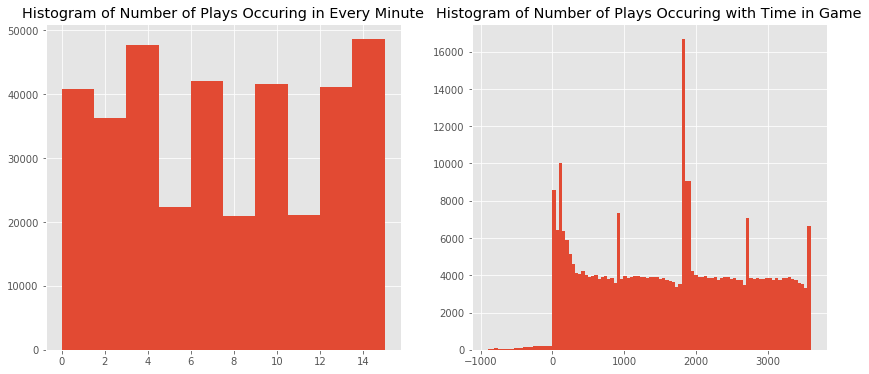

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['TimeUnder'])
plt.title('Histogram of Number of Plays Occuring in Every Minute')
plt.subplot(1,2,2)
plt.hist(df_cleaned['TimeSecs'].dropna(),bins=100)
plt.title('Histogram of Number of Plays Occuring with Time in Game')

### Let's make the plays per time histogram better...

(array([     0.,   2000.,   4000.,   6000.,   8000.,  10000.,  12000.,
         14000.,  16000.,  18000.]), <a list of 10 Text yticklabel objects>)

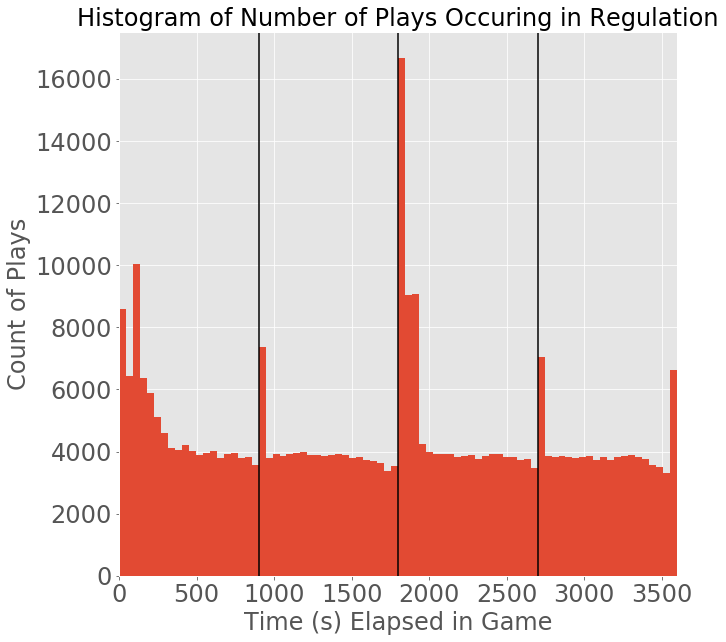

In [21]:
plt.figure(figsize=(10,10))
plt.hist(df_cleaned['TimeSecs'].dropna(),bins=100)
plt.xlim(0, 3600)
plt.axvline(x=900, color='black')
plt.axvline(x=1800, color='black')
plt.axvline(x=2700, color='black')
plt.title('Histogram of Number of Plays Occuring in Regulation', fontsize=24)
plt.xlabel('Time (s) Elapsed in Game', fontsize=24)
plt.ylabel('Count of Plays', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

### Plays by type

Looks as expected, passes and runs dominate.

Text(0,0.5,'Count of Plays')

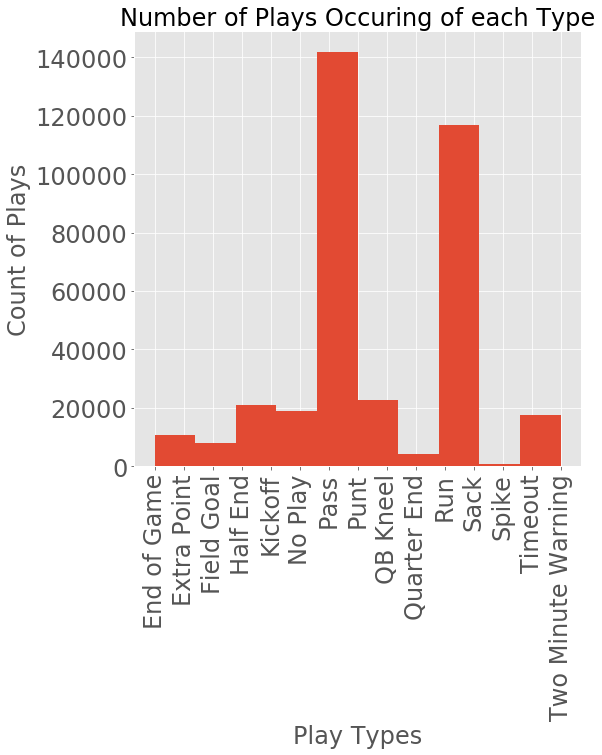

In [22]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned['PlayType'])
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)
plt.title('Number of Plays Occuring of each Type', fontsize=24)
plt.xlabel('Play Types', fontsize=24)
plt.ylabel('Count of Plays', fontsize=24)

### Plays by field position and down

(array([      0.,   20000.,   40000.,   60000.,   80000.,  100000.,
         120000.,  140000.]), <a list of 8 Text yticklabel objects>)

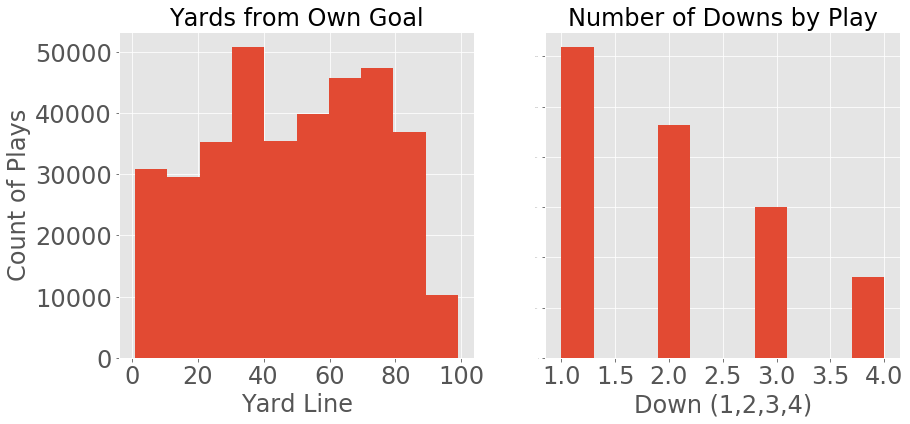

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(df_cleaned['yrdline100'].dropna())
plt.title('Yards from Own Goal', fontsize=24)
plt.xlabel('Yard Line', fontsize=24)
plt.ylabel('Count of Plays', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.subplot(1,2,2)
plt.hist(df_cleaned['down'].dropna())
plt.title('Number of Downs by Play', fontsize=24)
plt.xlabel('Down (1,2,3,4)', fontsize=24)
plt.ylabel('', fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=1)

Games with a given score differential occurring.  Most of the mass is at 7,10, and 14 as expected.

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.]),
 <a list of 7 Text yticklabel objects>)

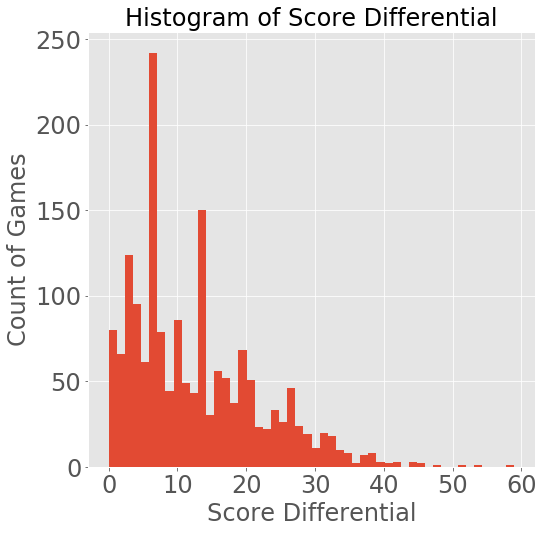

In [24]:
plt.figure(figsize=(8,8))
plt.hist(df_cleaned.loc[df_cleaned['PlayType']=='End of Game', 'ScoreDiff'].apply(abs).dropna(), bins=50)
plt.title('Histogram of Score Differential',fontsize=24)
plt.xlabel('Score Differential',fontsize=24)
plt.ylabel('Count of Games',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

## Write Data to new CSV (uncomment if needed)

In [25]:
#df_cleaned[(df_cleaned['Season'] == 2009) | (df_cleaned['Season']==2010) | (df_cleaned['Season']==2011) | (df_cleaned['Season']==2012)].to_csv('NFL_PlaybyPlay_Cleaned_2009_2012')
#df_cleaned[(df_cleaned['Season'] == 2013) | (df_cleaned['Season']==2014) | (df_cleaned['Season']==2015) | (df_cleaned['Season']==2016)].to_csv('NFL_PlaybyPlay_Cleaned_2013_2016')

df_cleaned['Season'].unique()


array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

## More Exploratory Analysis and Checking for Null Values

In [26]:
print('Total Number of plays ran: ',df_cleaned.loc[(pd.notnull(df_cleaned['posteam']))].shape[0])
print('Total Number of downed plays ran: ', df_cleaned.loc[(pd.notnull(df_cleaned['posteam'])) & 
                                                           (pd.notnull(df_cleaned['down']))].shape[0])
print('Number of Touchdowns: ', df_cleaned[df_cleaned['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_cleaned[df_cleaned['Safety']==1].shape[0])
print('Number of onside kicks: ', df_cleaned[df_cleaned['Onsidekick']==1].shape[0])
print('Number of Interceptions: ', df_cleaned[df_cleaned['InterceptionThrown']==1].shape[0])
print('Number of Field Goals: ', df_cleaned[pd.notnull(df_cleaned['FieldGoalResult'])].shape[0])
print('Number of Penalties: ', df_cleaned[df_cleaned['Penalty.Yards'] != 0].shape[0])

Total Number of plays ran:  340468
Total Number of downed plays ran:  308229
Number of Touchdowns:  10571
Number of Safetys:  142
Number of onside kicks:  496
Number of Interceptions:  4065
Number of Field Goals:  8016
Number of Penalties:  25859


In [27]:
plays = ['Pass','Run','Sack','QB Kneel','Spike','Field Goal']
df_filtered = df_cleaned[(df_cleaned['PlayType'].isin(plays))]
df_filtered = df_filtered[(pd.isna(df_filtered['TwoPointConv'])) & 
                          (df_filtered['Onsidekick']==0) & 
                         ~(pd.isna(df_filtered['down'])) ]
df_filtered = df_filtered[df_filtered['TimeSecs'] > 0]
dropped_cols = ['DefensiveTeam','PuntResult','Onsidekick','ExPointResult','sp',
                'TimeUnder','TwoPointConv','ReturnResult','PosTeamScore',
                'DefTeamScore','AbsScoreDiff','No_Score_Prob','Opp_Field_Goal_Prob',
                'Opp_Safety_Prob','Opp_Field_Goal_Prob','Touchdown_Prob','ExPoint_Prob','TwoPoint_Prob','ExpPts',
                'EPA','WPA','Opp_Safety_Prob','Opp_Touchdown_Prob','Win_Prob','Home_WP_pre',
                'Away_WP_pre', 'Field_Goal_Prob', 'Safety_Prob', 'PlayType', 'Drive', 'Yards.Gained']
df_filtered = df_filtered.drop(columns=dropped_cols)
df_filtered = df_filtered[df_filtered['result'] != 'T']

In [28]:
df_filtered.isna().any()

GameID                         False
qtr                            False
down                           False
TimeSecs                       False
yrdline100                     False
ydstogo                        False
ydsnet                         False
GoalToGo                       False
FirstDown                      False
posteam                        False
Touchdown                      False
Safety                         False
InterceptionThrown             False
FieldGoalResult                 True
FieldGoalDistance               True
Penalty.Yards                  False
ScoreDiff                      False
HomeTeam                       False
AwayTeam                       False
HomeTimeouts_Remaining_Pre     False
AwayTimeouts_Remaining_Pre     False
HomeTimeouts_Remaining_Post    False
AwayTimeouts_Remaining_Post    False
Home_WP_post                    True
Away_WP_post                    True
Season                         False
result                         False
d

In [29]:
print('Total Number of plays ran: ',df_filtered.shape[0])
print('Total Number of downed plays ran: ', df_filtered.loc[(pd.notnull(df_filtered['down']))].shape[0])
print('Number of Touchdowns: ', df_filtered[df_filtered['Touchdown']==1].shape[0])
print('Number of Safetys: ', df_filtered[df_filtered['Safety']==1].shape[0])
print('Number of Interceptions: ', df_filtered[df_filtered['InterceptionThrown']==1].shape[0])
print('Number of Penalties: ', df_filtered[df_filtered['Penalty.Yards'] != 0].shape[0])
print('Number of Field Goals: ', df_filtered[pd.notnull(df_filtered['FieldGoalResult'])].shape[0])

Total Number of plays ran:  221124
Total Number of downed plays ran:  221124
Number of Touchdowns:  8519
Number of Safetys:  88
Number of Interceptions:  3240
Number of Penalties:  3277
Number of Field Goals:  6263


In [30]:
print("Data shape: ",df_filtered.shape)
#df_filtered.head(20)

print("Play counts in sample of games: ")
print(df_filtered.GameID.value_counts()[0:10])
print()
print("Play Counts By Year: ")
print(df_filtered.Season.value_counts())

#df_filtered.head(10)

Data shape:  (221124, 27)
Play counts in sample of games: 
2011120406    198
2014111602    166
2012121613    162
2014090707    158
2014110208    158
2015111505    158
2014090701    157
2015092000    157
2014090705    157
2013092204    157
Name: GameID, dtype: int64

Play Counts By Year: 
2014    28603
2013    28420
2011    28129
2009    27779
2015    27541
2016    27142
2010    26756
2012    26754
Name: Season, dtype: int64


Check field goal variables and remove N/A

In [31]:
df_filtered.FieldGoalDistance = df_filtered.FieldGoalDistance.fillna(0)
df_filtered.FieldGoalResult = df_filtered.FieldGoalResult.fillna(0)

print("Checking field goal data: ")
df_filtered.FieldGoalResult.value_counts()

Checking field goal data: 


0          214861
Good         5290
No Good       840
Blocked       133
Name: FieldGoalResult, dtype: int64

Turn field goal variables to dummies.  Add on Score Differential / Time variable

In [32]:
field_goal_df = pd.DataFrame(df_filtered.FieldGoalResult)
field_goal_df = pd.get_dummies(field_goal_df, drop_first=True)
df_filtered = df_filtered.drop(columns=['FieldGoalResult'])
df_filtered = df_filtered.join(field_goal_df)

In [33]:
df_filtered['scorediff_divsecs'] = df_filtered.ScoreDiff/(df_filtered.TimeSecs + 0.01)

## Splitting Training and Testing Sets

In [34]:
Train = df_filtered[df_filtered['Season'].isin([2009, 2010, 2011, 2012, 2013, 2014, 2015])]
Test = df_filtered[df_filtered['Season']==2016]
print(Train.shape)
print(Test.shape)

(193982, 30)
(27142, 30)


In [119]:
print('Train Games: ',len(set(Train.GameID)))
print('Test Games: ',len(set(Test.GameID)))

Train Games:  1486
Test Games:  208


## Initial Model Buidling

## Random Forest

### Stage 1. No cross validation 

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#features = df_filtered.drop(columns=['result', 'Season'])
#outcome = df_filtered.result
#X_train, X_test, y_train, y_test = train_test_split(features, outcome, test_size=0.25)
y_train = Train.result
X_train = Train.drop(columns=['result'])
y_test = Test.result
X_test = Test.drop(columns=['result'])
 

X_train_identifiers = X_train[['GameID', 'HomeTeam', 'AwayTeam', 'Home_WP_post', 'Away_WP_post', 'posteam', 'Season']].copy()
X_test_identifiers = X_test[['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam', 'Season']].copy()
X_train = X_train.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])
X_test = X_test.drop(columns=['GameID', 'HomeTeam', 'AwayTeam','Home_WP_post','Away_WP_post', 'posteam','Season'])

random_forest_classifier = RandomForestClassifier(n_estimators=200, 
                                                  criterion='entropy', 
                                                  n_jobs=-1, 
                                                  random_state=42, 
                                                  max_depth=10)

random_forest_classifier.fit(X_train, y_train)




RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
#Accuracy scores and feature importance
feature_importances = random_forest_classifier.feature_importances_
feature_df = pd.DataFrame(feature_importances, columns=['Importance'])
feature_df['Cols'] = X_train.columns
prediction = random_forest_classifier.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, prediction),3))

Test Accuracy Rate:  0.771


In [37]:
probabilities = random_forest_classifier.predict_proba(X_test)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text yticklabel objects>)

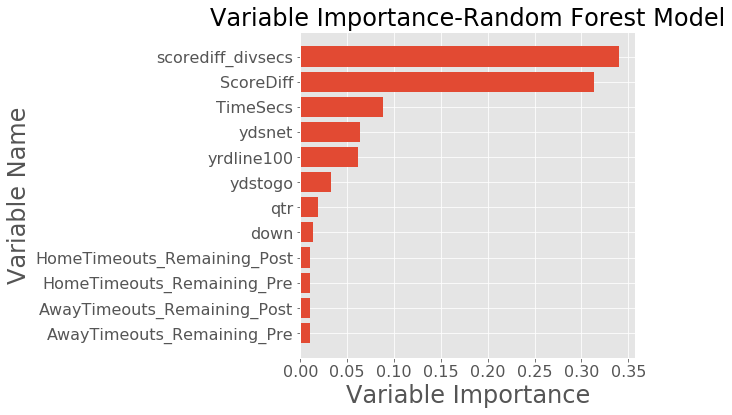

In [39]:
var_import = dict(zip(feature_df.sort_values(by=['Importance'], ascending=False).Cols, 
                      feature_df.sort_values(by=['Importance'], ascending=False).Importance))
values = list(var_import.values())[0:12]
labels = list(var_import.keys())[0:12]

plt.figure(figsize=(6,6))
plt.barh(range(12),values[::-1])
plt.yticks(range(12),labels[::-1])
plt.ylabel('Variable Name',fontsize=24)
plt.xlabel('Variable Importance',fontsize=24)
plt.title('Variable Importance-Random Forest Model',fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

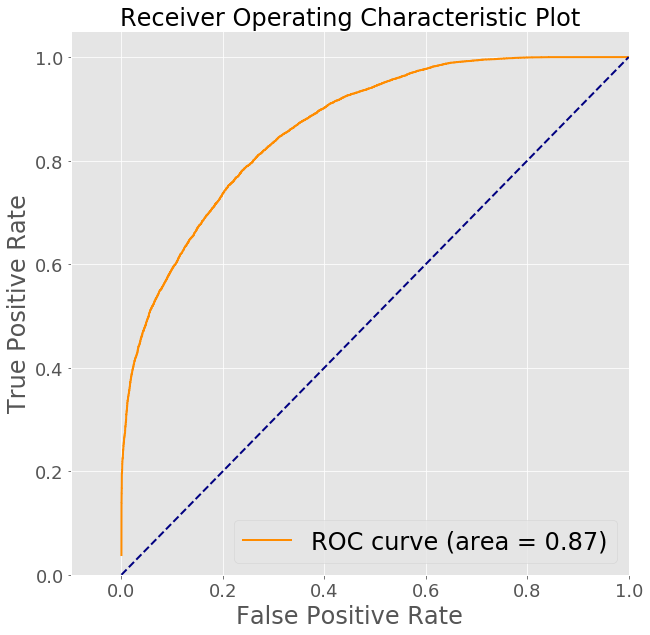

In [105]:
#ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve([1 if x is 'W' else 0 for x in y_test], probabilities[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate',fontsize=24)
plt.title('Receiver Operating Characteristic Plot',fontsize=24)
plt.legend(loc="lower right",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [42]:
#Check how a game looks
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.as_matrix()
game_prob_df['TimeSecs'] = X_test['TimeSecs']

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)
#game_prob_df.head(10)


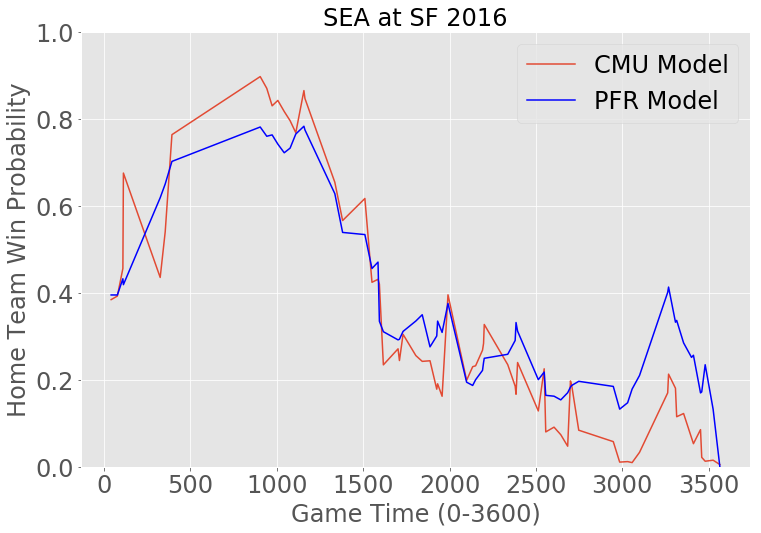

In [106]:
test_game1  = game_prob_df[(game_prob_df['GameID']== 2017010115) & (game_prob_df['posteam']=='SEA')]

plt.figure(figsize=(12,8))
plt.plot(3600-test_game1.TimeSecs, test_game1.predicted_win_prob)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.title('SEA at SF 2016',fontsize=24)
plt.xlabel('Game Time (0-3600)',fontsize=24)
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(labels=['CMU Model', 'PFR Model'],fontsize=24)

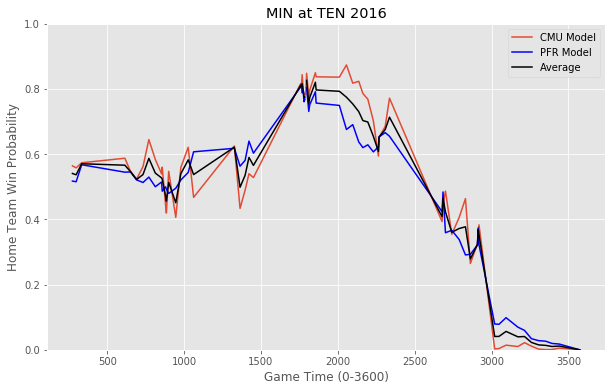

In [74]:
#Another game for quality assurance
test_game2  = game_prob_df[(game_prob_df['GameID']== 2016091108) & (game_prob_df['posteam']=='MIN')]

plt.figure(figsize=(10,6))
plt.plot(3600-test_game2.TimeSecs, test_game2.predicted_win_prob)
plt.plot(3600-test_game2.TimeSecs, test_game2.Home_WP_post, c='b')
plt.plot(3600-test_game2.TimeSecs, (test_game2.Home_WP_post + test_game2.predicted_win_prob)/2, c='black')
plt.title('MIN at TEN 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability')
plt.legend(labels=['CMU Model', 'PFR Model', 'Average'])

### Version 2. w/ grid search

In [111]:
#This will take a while to run
from sklearn.model_selection import GridSearchCV

rf_parameters = {'criterion':['entropy'],
                 'max_depth':[x for x in range(10,31,5)], 
                 'n_estimators':[200]}

rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=5, n_jobs=-1)
rf_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['entropy'], 'max_depth': [10, 15, 20, 25, 30], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
rf_clf.cv_results_

C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\spleahy\Anaconda3\lib\site-packages\sklear

{'mean_fit_time': array([  70.97548776,  108.74711514,  137.05230765,  158.58517132,
         167.51430359]),
 'mean_score_time': array([ 2.10265322,  3.0373877 ,  4.09800673,  4.80395265,  5.23615384]),
 'mean_test_score': array([ 0.77904135,  0.77902589,  0.77666485,  0.77186028,  0.76734955]),
 'mean_train_score': array([ 0.78693513,  0.82123986,  0.89002588,  0.95946016,  0.99087029]),
 'param_criterion': masked_array(data = ['entropy' 'entropy' 'entropy' 'entropy' 'entropy'],
              mask = [False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [10 15 20 25 30],
              mask = [False False False False False],
        fill_value = ?),
 'param_n_estimators': masked_array(data = [200 200 200 200 200],
              mask = [False False False False False],
        fill_value = ?),
 'params': [{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200},
  {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200},
  {'criteri

In [113]:
rf_clf.score(X_test, y_test)

0.77665610492962933

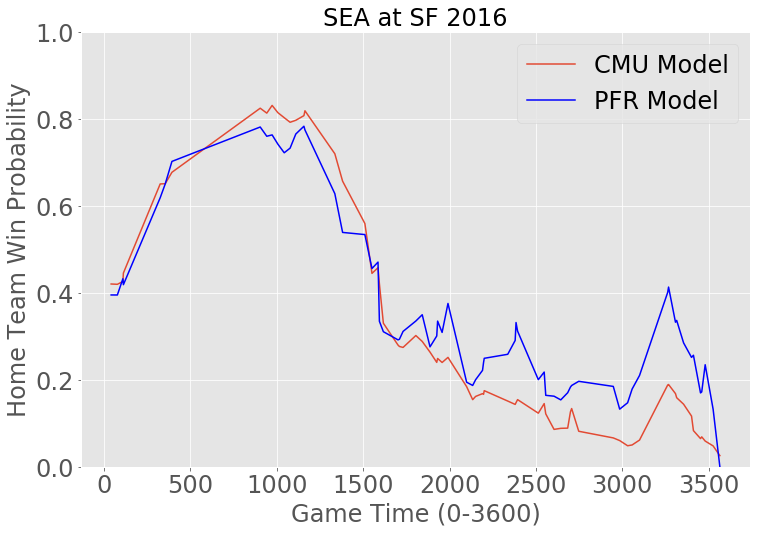

In [139]:
#Even better!
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.as_matrix()
game_prob_df['TimeSecs'] = X_test['TimeSecs']

rf_grid_probs = rf_clf.predict_proba(X_test)
game_prob_df['rf_grid_probs'] = rf_grid_probs[:,0]

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)

test_game1  = game_prob_df[(game_prob_df['GameID']== 2017010115) & (game_prob_df['posteam']=='SEA')]

plt.figure(figsize=(12,8))
plt.plot(3600-test_game1.TimeSecs, test_game1.rf_grid_probs)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.title('SEA at SF 2016',fontsize=24)
plt.xlabel('Game Time (0-3600)',fontsize=24)
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(labels=['CMU Model', 'PFR Model'],fontsize=24)

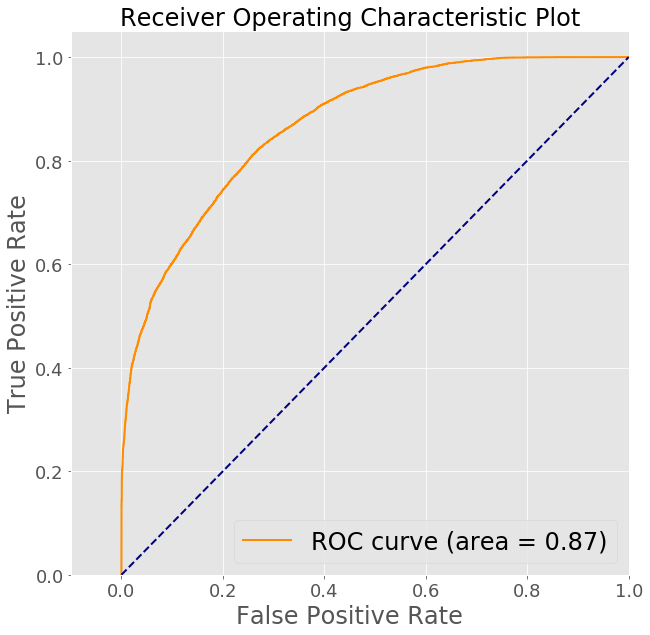

In [143]:
fpr, tpr, _ = roc_curve([1 if x is 'W' else 0 for x in y_test], rf_grid_probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=24)
plt.ylabel('True Positive Rate',fontsize=24)
plt.title('Receiver Operating Characteristic Plot',fontsize=24)
plt.legend(loc="lower right",fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

### Version 3. PCA RF - No change from above

In [48]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
# pca = PCA(n_components=10)

# scaled_train = pca.fit_transform(scale(X_train))
# scaled_test = pca.transform(scale(X_test))

In [49]:
#pca_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid=rf_parameters, cv=10, n_jobs=-1)
#pca_rf_clf.fit(scaled_train, y_train)

# random_forest_classifier.fit(scaled_train, y_train)

In [50]:
#rf_clf.grid_scores_
# pca_prediction = random_forest_classifier.predict(scaled_test)

In [51]:
#rf_clf.score(scaled_test, y_test)
# print('Test Accuracy Rate: ',round(accuracy_score(y_test, pca_prediction),3))

### Version 4. Gradient Boosting - No improvement over RF, so we will exclude for the sake of space

In [140]:
from  sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=300, max_depth=2, subsample=0.8)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

Test Accuracy Rate:  0.774


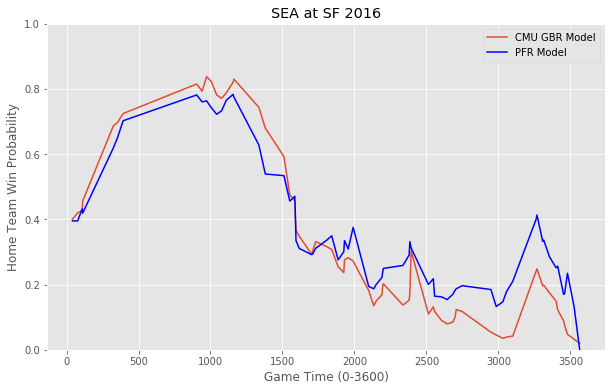

In [142]:
prob_df = pd.DataFrame(probabilities[:,0], columns=['predicted_win_prob'])
game_prob_df = pd.DataFrame(X_test_identifiers)
game_prob_df['predicted_win_prob'] = prob_df.as_matrix()
game_prob_df['TimeSecs'] = X_test['TimeSecs']

gbc_predict = gbc.predict(X_test)
print('Test Accuracy Rate: ',round(accuracy_score(y_test, gbc_predict),3))

gbc_probabilities = gbc.predict_proba(X_test)
game_prob_df['gbc_predicted_win_prob'] = gbc_probabilities[:,0]

game_prob_df = game_prob_df.sort_values(by=['GameID', 'TimeSecs'], ascending=False)

test_game1  = game_prob_df[(game_prob_df['GameID']== 2017010115) & (game_prob_df['posteam']=='SEA')]
plt.figure(figsize=(10,6))
plt.plot(3600-test_game1.TimeSecs, test_game1.gbc_predicted_win_prob)
plt.plot(3600-test_game1.TimeSecs, test_game1.Home_WP_post, c='b')
plt.title('SEA at SF 2016')
plt.xlabel('Game Time (0-3600)')
plt.ylim(0,1)
plt.ylabel('Home Team Win Probability')
plt.legend(labels=['CMU GBR Model', 'PFR Model'])

## Finding Optimal Time to Predict Outcome

In [54]:
result_3_10 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_10.csv')
result_3_12 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_12.csv')
result_3_4 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_4.csv')
result_3_6 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_6.csv')
result_3_8 = pd.read_csv('results_with_timeOffSetOf_3_and_number_samples_of_8.csv')
result_4_10 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_10.csv')
result_4_12 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_12.csv')
result_4_4 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_4.csv')
result_4_6 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_6.csv')
result_4_8 = pd.read_csv('results_with_timeOffSetOf_4_and_number_samples_of_8.csv')
result_5_10 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_10.csv')
result_5_12 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_12.csv')
result_5_4 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_4.csv')
result_5_6 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_6.csv')
result_5_8 = pd.read_csv('results_with_timeOffSetOf_5_and_number_samples_of_8.csv')
result_6_10 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_10.csv')
result_6_12 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_12.csv')
result_6_4 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_4.csv')
result_6_6 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_6.csv')
result_6_8 = pd.read_csv('results_with_timeOffSetOf_6_and_number_samples_of_8.csv')
results_75_4 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_4.csv')
result_75_10 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_10.csv')
result_75_12 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_12.csv')
result_75_8 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_8.csv')
result_75_6 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_4 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_6 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_8 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_10 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')
result_12_12 = pd.read_csv('results_with_timeOffSetOf_7.5_and_number_samples_of_6.csv')

In [55]:
#Test this on one data set of parameters.  Use Cross validated Logistic Regression and get test data accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

results_75_4 = results_75_4[~(pd.isna(results_75_4['probability sample: 1'])) & 
                           ~(pd.isna(results_75_4['probability sample: 2'])) & 
                           ~(pd.isna(results_75_4['probability sample: 3'])) &
                           ~(pd.isna(results_75_4['probability sample: 4']))]
outcome = results_75_4['Home Team Result']
game = results_75_4['GameID']
feats = results_75_4.drop(columns=['GameID','Home Team Result'])
train_feat, test_feat,train_label, test_label = train_test_split(feats, outcome,test_size=.25)
lrcv = LogisticRegressionCV()
lrcv.fit(train_feat, train_label)
print('Test Accuracy Rate: ',round(accuracy_score(test_label, lrcv.predict(test_feat)),3))
print(train_feat.shape)
print(test_feat.shape)

Test Accuracy Rate:  0.872
(1269, 4)
(423, 4)


### For all sets of hyper-parameters fit a cross validated logistic regression and get testing evaluation metric

In [65]:
#Now perform for all datasets and for all metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

file_list = [result_3_4,result_3_6,result_3_8,result_3_10,result_3_12,
             result_4_4,result_4_6,result_4_8,result_4_10,result_4_12,
             result_5_4,result_5_6,result_5_8,result_5_10,result_5_12,
             result_6_4,result_6_6,result_6_8,result_6_10,result_6_12,
             results_75_4,result_75_6,result_75_8,result_75_10,result_75_12,
            results_75_4,result_75_6,result_75_8,result_75_10,result_75_12,
            result_12_4,result_12_6,result_12_8,result_12_10,result_12_12]

hyper_params = [('Offset time: 3min','weights = 4'),('Offset time: 3min','weights = 6'),('Offset time: 3min','weights = 8'),
                ('Offset time: 3min','weights = 10'),('Offset time: 3min','weights = 12'),
                ('Offset time: 4min','weights = 4'),('Offset time: 4min','weights = 6'),('Offset time: 4min','weights = 8'),
                ('Offset time: 4min','weights = 10'), ('Offset time: 4min','weights = 12'),
                ('Offset time: 5min','weights = 4'),('Offset time: 5min','weights = 6'),('Offset time: 5min','weights = 8'),
                ('Offset time: 5min','weights = 10'),('Offset time: 5min','weights = 12'),
                ('Offset time: 6min','weights = 4'),('Offset time: 6min','weights = 6'),('Offset time: 6min','weights = 8'),
                ('Offset time: 6min','weights = 10'),('Offset time: 6min','weights = 12'),
                ('Offset time: 7.5min','weights = 4'),('Offset time: 7.5min','weights = 6'),('Offset time: 7.5min','weights = 8'),
                ('Offset time: 7.5min','weights = 10'),('Offset time: 7.5min','weights = 12'),
               ('Offset time: 12min','weights = 4'),('Offset time: 12min','weights = 6'),('Offset time: 12min','weights = 8'),
                ('Offset time: 12min','weights = 10'),('Offset time: 12min','weights = 12')]

test_accs = []
test_precision = []
test_F1 = []
for file,params in zip(file_list,hyper_params):
    file = file[~(pd.isna(file['probability sample: 1'])) & 
                           ~(pd.isna(file['probability sample: 2'])) & 
                           ~(pd.isna(file['probability sample: 3'])) &
                           ~(pd.isna(file['probability sample: 4']))]
    outcome = file['Home Team Result']
    game = file['GameID']
    feats = file.drop(columns=['GameID','Home Team Result'])
    train_feat, test_feat,train_label, test_label = train_test_split(feats, outcome,test_size=.25)
    lrcv = LogisticRegressionCV()
    lrcv.fit(train_feat, train_label)
    predictions = lrcv.predict(test_feat)
    test_accs.append(round(accuracy_score(test_label, predictions),3))
    binary_preds = [1 if x is 'W' else 0 for x in predictions]
    binary_true = [1 if x is 'W' else 0 for x in test_label]
    test_precision.append(average_precision_score(binary_true, binary_preds))
    test_F1.append(f1_score(binary_true, binary_preds))
    print(params,' Test Accuracy Rate: ',round(accuracy_score(test_label, predictions),3)) 
    print('    Test Precision Score: ', average_precision_score(binary_true, binary_preds))
    print('    Test F1-Score: ', f1_score(binary_true, binary_preds))

('Offset time: 3min', 'weights = 4')  Test Accuracy Rate:  0.936
    Test Precision Score:  0.925856366496
    Test F1-Score:  0.946107784431
('Offset time: 3min', 'weights = 6')  Test Accuracy Rate:  0.955
    Test Precision Score:  0.948941866758
    Test F1-Score:  0.961923847695
('Offset time: 3min', 'weights = 8')  Test Accuracy Rate:  0.943
    Test Precision Score:  0.939083414563
    Test F1-Score:  0.947826086957
('Offset time: 3min', 'weights = 10')  Test Accuracy Rate:  0.943
    Test Precision Score:  0.93616153385
    Test F1-Score:  0.951417004049
('Offset time: 3min', 'weights = 12')  Test Accuracy Rate:  0.927
    Test Precision Score:  0.887727591454
    Test F1-Score:  0.931567328918
('Offset time: 4min', 'weights = 4')  Test Accuracy Rate:  0.908
    Test Precision Score:  0.889491104371
    Test F1-Score:  0.92152917505
('Offset time: 4min', 'weights = 6')  Test Accuracy Rate:  0.931
    Test Precision Score:  0.910809682392
    Test F1-Score:  0.936819172113
('Offs

### heatmaps of metric evaluation for each set of hyper-parameters

In [57]:
offset_times= [3,4,5,6,7.5, 12]
weight_num=[4,6,8,10,12]

test_accs_array = np.array(test_accs).reshape(6,5)

Text(0.5,1,'Heatmap of Accuracies of Offset Times and Number of Weights')

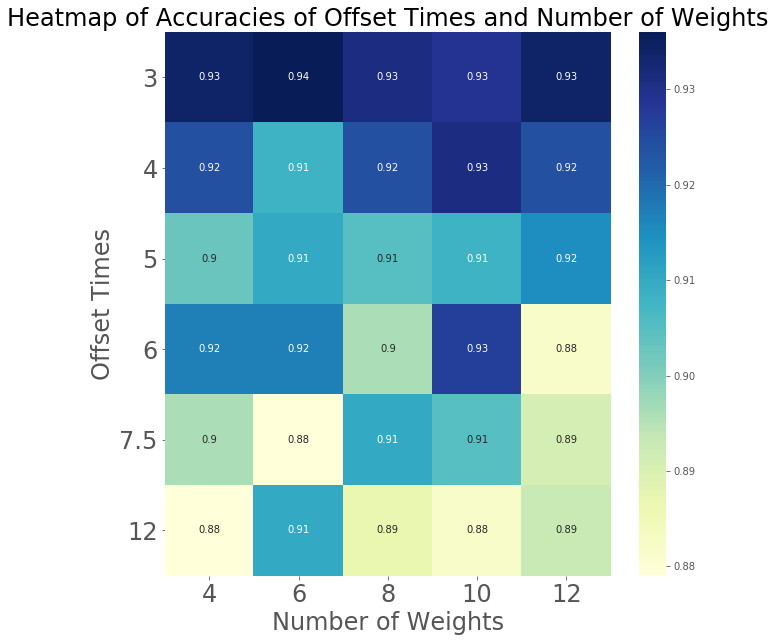

In [58]:
#heatmaps
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(test_accs_array, annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5],offset_times,fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5],weight_num,fontsize=24)
plt.ylabel('Offset Times',fontsize=24)
plt.xlabel('Number of Weights',fontsize=24)
plt.title('Heatmap of Accuracies of Offset Times and Number of Weights',fontsize=24)
#plt.tight_layout()

Text(0.5,1,'Heatmap of Precision Scores of Offset Times and Number of Weights')

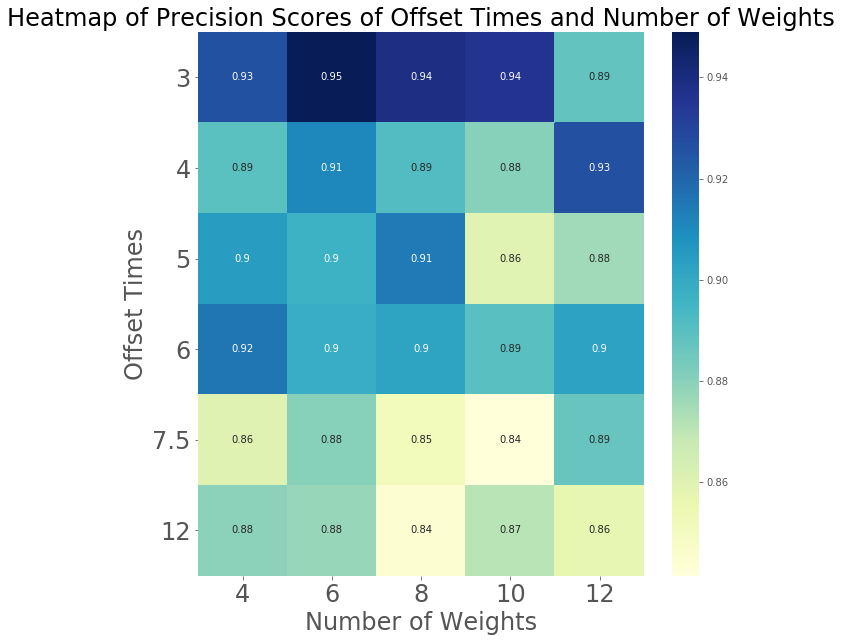

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(np.array(test_precision).reshape(6,5), annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5],offset_times,fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5],weight_num,fontsize=24)
plt.ylabel('Offset Times',fontsize=24)
plt.xlabel('Number of Weights',fontsize=24)
plt.title('Heatmap of Precision Scores of Offset Times and Number of Weights',fontsize=24)

Text(0.5,1,'Heatmap of F1 Scores of Offset Times and Number of Weights')

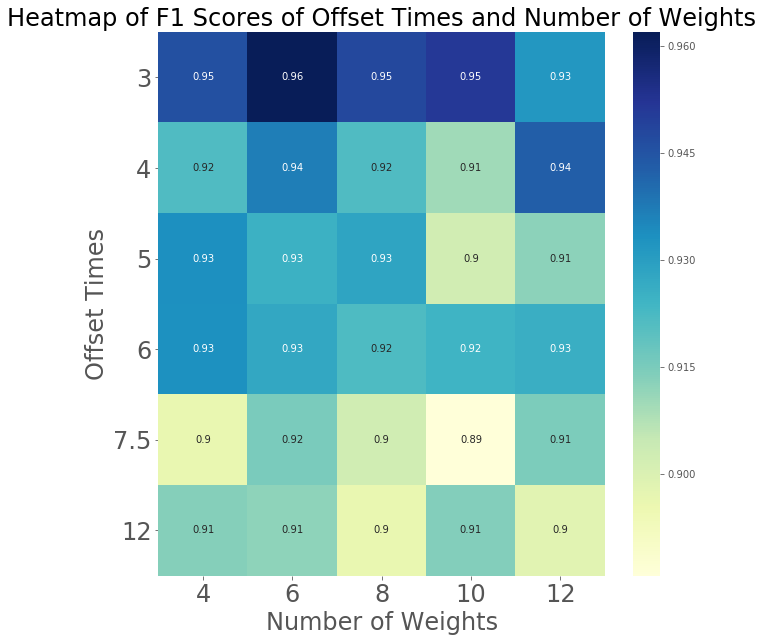

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(np.array(test_F1).reshape(6,5), annot=True, cmap="YlGnBu")

plt.yticks([0.5,1.5,2.5,3.5,4.5, 5.5],offset_times,fontsize=24, rotation=0)
plt.xticks([0.5,1.5,2.5,3.5,4.5],weight_num,fontsize=24)
plt.ylabel('Offset Times',fontsize=24)
plt.xlabel('Number of Weights',fontsize=24)
plt.title('Heatmap of F1 Scores of Offset Times and Number of Weights',fontsize=24)